In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1 Cross-validation on the Iris dataset

### 1.1 load the data first and then standardize the features

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(150, 4)

### 1.2 compute training errors for each k above

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_errors = []
k_values = [i for i in range (1,15)]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X,y).predict(X)
    accuracy = accuracy_score(y, y_pred)
    train_errors.append(1-accuracy)
    
for err in train_errors:
    print("%.4f" % err);

0.0000
0.0267
0.0467
0.0400
0.0467
0.0333
0.0333
0.0333
0.0400
0.0400
0.0400
0.0467
0.0333
0.0333


### 1.3 plot the training errors against k

Text(0, 0.5, 'Error')

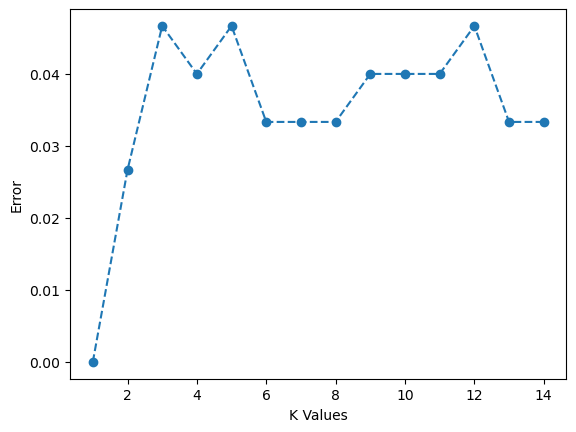

In [4]:
import matplotlib.pyplot as plt
    
plt.plot(k_values, train_errors, marker='o', linestyle="--")
plt.xlabel("K Values")
plt.ylabel("Error")

### 1.4 k-fold cross validation for kNN

best k =  6


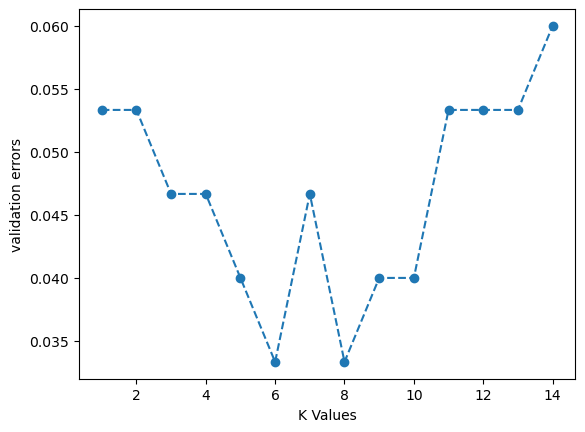

In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score

validation_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    validation_errors.append(1-np.mean(score))
    
plt.plot(k_values, validation_errors, marker='o', linestyle="--")
plt.xlabel("K Values")
plt.ylabel("validation errors")

best_index = np.argmin(validation_errors)
best_k = k_values[best_index]
print("best k = ", best_k)

### 1.5 If test data are available, then execute the following

In [6]:
# knn = KNeighborsClassifier(n_neighbors=best_k)
# knn.fit(X, y)
# y_pred = knn.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# 2 bootstrap sampling

In [7]:
import random

# data set
x = [1,3,5,7,9] 
#x = np.random.normal(loc=5.0, scale=4, size=100)

print(x)
print(np.mean(x))

[1, 3, 5, 7, 9]
5.0


In [8]:
# draw 50 bootstrap samples

bootstrap_means = []
for i in range(50):
    
    bootstrap_sample = np.random.choice(x, np.size(x), replace=True)
    bootstrap_sample_mean = np.mean(bootstrap_sample)
    print(bootstrap_sample, bootstrap_sample_mean)
    
    bootstrap_means.append(bootstrap_sample_mean)
    
print("")

print("bootstrap estimate of the mean =", np.mean(bootstrap_means))

print("standard error of the sample mean =", np.std(bootstrap_means))

[1 3 5 9 5] 4.6
[5 9 7 7 7] 7.0
[5 9 7 9 5] 7.0
[3 9 1 1 1] 3.0
[1 7 5 3 3] 3.8
[3 3 3 3 5] 3.4
[9 5 1 3 5] 4.6
[1 1 7 1 9] 3.8
[3 1 7 1 7] 3.8
[7 9 9 7 1] 6.6
[3 7 3 3 5] 4.2
[3 5 3 9 5] 5.0
[1 1 7 1 1] 2.2
[7 1 3 9 5] 5.0
[5 1 1 3 1] 2.2
[1 1 9 3 9] 4.6
[1 5 5 5 9] 5.0
[5 3 3 3 1] 3.0
[7 3 1 7 7] 5.0
[3 5 5 7 7] 5.4
[9 7 5 5 7] 6.6
[7 9 9 7 1] 6.6
[9 7 7 5 1] 5.8
[1 7 7 7 5] 5.4
[5 3 9 9 7] 6.6
[3 1 3 9 5] 4.2
[7 9 1 9 7] 6.6
[3 5 3 5 9] 5.0
[9 1 9 9 3] 6.2
[5 7 5 7 3] 5.4
[9 3 1 1 7] 4.2
[7 3 5 3 1] 3.8
[1 5 3 7 1] 3.4
[9 9 1 7 5] 6.2
[5 3 1 7 3] 3.8
[7 9 9 7 1] 6.6
[7 7 7 9 5] 7.0
[7 5 1 3 9] 5.0
[9 1 9 9 3] 6.2
[7 5 7 1 9] 5.8
[3 5 3 9 7] 5.4
[9 3 1 7 1] 4.2
[7 5 1 7 3] 4.6
[3 5 9 9 3] 5.8
[3 7 9 5 9] 6.6
[1 5 9 5 7] 5.4
[5 9 3 5 1] 4.6
[1 3 3 1 1] 1.8
[5 1 7 5 7] 5.0
[7 9 3 1 7] 5.4

bootstrap estimate of the mean = 4.968
standard error of the sample mean = 1.3165773809389254


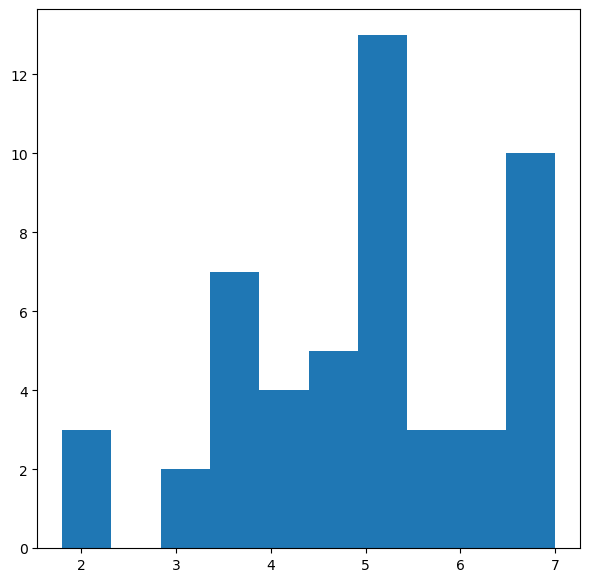

In [9]:
fig, ax = plt.subplots(figsize =(7, 7))
ax.hist(bootstrap_means)
 
plt.show()